In [ ]:
!pip install spotipy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from skimage import io
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials

In [ ]:
dados_totais = pd.read_csv('Dados_totais.csv')
dados_de_generos = pd.read_csv('data_by_genres.csv')
dados_de_ano = pd.read_csv('data_by_year.csv')

In [ ]:
# dados_totais.drop(["key", "mode"], axis=1, inplace = True)
# dados_de_generos.drop(["key", "mode"], axis=1, inplace = True)
# dados_de_ano.drop(["key", "mode"], axis=1, inplace = True)
dados_totais.drop('explicit', axis = 1, inplace = True)

In [ ]:
dados_totais.head(2)

,valence,year,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,artists_song
0,0.285,2000,0.00239,Coldplay,0.429,266773,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,11,0.2340,-7.227,1,Yellow,84,0.0281,173.372,Coldplay - Yellow
1,0.613,2000,0.14300,OutKast,0.843,270507,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,4,0.0771,-5.946,0,Ms. Jackson,80,0.2690,94.948,OutKast - Ms. Jackson


In [ ]:
dados_de_generos.head(2)

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.3616,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.1310,-16.854000,0.076817,120.285667,0.221750,52.500000,5


In [ ]:
dados_de_ano.head(2)

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.20571,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.24072,-19.275282,0.116655,100.884521,0.535549,0.140845,10


In [ ]:
fig = px.line(dados_de_ano, x ='year', y = 'loudness', markers = True, title ='Variação do loudness ao longo dos anos')
fig.show()

In [ ]:
dados_de_ano = dados_de_ano.query('year >= 2000')
dados_de_ano['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [ ]:
dados_de_ano.reset_index()

,index,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,79,1,2000,0.289323,0.590918,242724.642638,0.625413,0.101168,0.197686,-8.247766,0.089205,118.999323,0.559475,46.684049,7
1,80,1,2001,0.286842,0.583318,240307.796010,0.626986,0.107214,0.187026,-8.305095,0.089182,117.765399,0.541479,48.750125,7
2,81,1,2002,0.282624,0.576160,239503.283000,0.641270,0.088048,0.193911,-7.686640,0.084308,119.239738,0.542397,48.655500,7
3,82,1,2003,0.256471,0.575763,244670.575230,0.660165,0.083049,0.196976,-7.485545,0.093926,120.914622,0.530504,48.626407,7
4,83,1,2004,0.280559,0.567680,237378.708037,0.648868,0.077934,0.202199,-7.601655,0.094239,121.290346,0.524489,49.273143,7
5,84,1,2005,0.255764,0.572281,237229.588205,0.653209,0.090194,0.190082,-7.466159,0.093334,121.617967,0.532531,50.953333,0
6,85,1,2006,0.279986,0.568230,234042.914359,0.650326,0.077701,0.188289,-7.265501,0.085847,121.798615,0.520028,51.313846,7
7,86,1,2007,0.254081,0.563414,241049.962564,0.668305,0.072957,0.196127,-7.044536,0.084347,124.087516,0.516794,51.075897,7
8,87,1,2008,0.249192,0.579193,240107.315601,0.671461,0.063662,0.198431,-6.843804,0.077356,123.509934,0.527542,50.630179,0
9,88,1,2009,0.261929,0.564190,238140.013265,0.670749,0.075872,0.205252,-7.046015,0.085458,123.463808,0.507170,51.440816,0


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=dados_de_ano['year'], y=dados_de_ano['acousticness'],
                    name='Acousticness'))
fig.add_trace(go.Scatter(x=dados_de_ano['year'], y=dados_de_ano['valence'],
                    name='Valence'))
fig.add_trace(go.Scatter(x=dados_de_ano['year'], y=dados_de_ano['danceability'],
                    name='Danceability'))
fig.add_trace(go.Scatter(x=dados_de_ano['year'], y=dados_de_ano['energy'],
                    name='Energy'))
fig.add_trace(go.Scatter(x=dados_de_ano['year'], y=dados_de_ano['instrumentalness'],
                    name='Instrumentalness'))
fig.add_trace(go.Scatter(x=dados_de_ano['year'], y=dados_de_ano['liveness'],
                    name='Liveness'))
fig.add_trace(go.Scatter(x=dados_de_ano['year'], y=dados_de_ano['speechiness'],
                    name='Speechiness'))

fig.show()

In [ ]:
fig = px.imshow(dados_totais.corr(), text_auto=True)
fig.show()

<ipython-input-67-d765be67faae>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
dados_de_generos

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,1,zolo,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2969,0,zouglou,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2970,1,zouk,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2971,0,zurich indie,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7


In [ ]:
dados_de_generos1 = dados_de_generos.drop('genres', axis = 1)
dados_de_generos1

,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,1,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2969,0,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2970,1,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2971,0,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7


In [ ]:
standardscaler = StandardScaler()

SEED = 1234
np.random.seed(1234)
pca = PCA(n_components= 2, random_state = SEED)

pca_pipeline = Pipeline([('scaler', standardscaler), ('pca', pca)])

In [ ]:
genre_embedding_pca = pca_pipeline.fit_transform(dados_de_generos1)

In [ ]:
genre_embedding_pca

array([[ 5.91302831, -0.02273436],
       [ 2.80844292,  4.521472  ],
       [-0.75364865, -1.2977702 ],
       ...,
       [-0.78723741, -1.12986694],
       [ 1.63721191, -3.43121992],
       [-1.02221946, -1.43250551]])

In [ ]:
projection = pd.DataFrame(columns = ['x', 'y'], data = genre_embedding_pca)
projection

,x,y
0,5.913028,-0.022734
1,2.808443,4.521472
2,-0.753649,-1.297770
3,1.017765,-0.948859
4,0.754944,-1.036757
...,...,...
2968,-0.513290,-0.044401
2969,-3.144863,-1.129382
2970,-0.787237,-1.129867
2971,1.637212,-3.431220


In [ ]:
kmeans_pca = KMeans(n_clusters = 4, verbose = True, random_state = SEED)

kmeans_pca.fit(projection)

predict = kmeans_pca.predict(projection)
dados_de_generos['cluster_pca'] = predict
projection['cluster_pca'] = predict

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Initialization complete
Iteration 0, inertia 4341.283830097584.
Iteration 1, inertia 4118.036091429093.
Iteration 2, inertia 4104.749130621752.
Iteration 3, inertia 4100.958088376225.
Iteration 4, inertia 4099.908300890414.
Iteration 5, inertia 4099.57536890317.
Converged at iteration 5: center shift 0.00011688398349179416 within tolerance 0.0002721724414303567.
Initialization complete
Iteration 0, inertia 7119.357256184538.
Iteration 1, inertia 5102.4229485550495.
Iteration 2, inertia 4707.566389357771.
Iteration 3, inertia 4446.127927608219.
Iteration 4, inertia 4257.157944968585.
Iteration 5, inertia 4181.975571348657.
Iteration 6, inertia 4140.975218635271.
Iteration 7, inertia 4113.2012576506.
Iteration 8, inertia 4103.720286604407.
Iteration 9, inertia 4101.031400231759.
Iteration 10, inertia 4100.027245967829.
Iteration 11, inertia 4099.629249535254.
Converged at iteration 11: center shift 0.00013808296343416639 within tolerance 0.0002721724414303567.
Initialization complete
Ite

In [ ]:
projection['generos'] = dados_de_generos['genres']

In [ ]:
projection

,x,y,cluster_pca,generos
0,5.913028,-0.022734,2,21st century classical
1,2.808443,4.521472,2,432hz
2,-0.753649,-1.297770,3,8-bit
3,1.017765,-0.948859,0,[]
4,0.754944,-1.036757,0,a cappella
...,...,...,...,...
2968,-0.513290,-0.044401,3,zolo
2969,-3.144863,-1.129382,3,zouglou
2970,-0.787237,-1.129867,3,zouk
2971,1.637212,-3.431220,0,zurich indie


In [ ]:
  fig = px.scatter(projection, x= 'x', y='y', color='cluster_pca', hover_data=['x', 'y', 'generos'])

  fig.show()

In [ ]:
#O output diz sobre a qtd de informações mantidas na análise
pca_pipeline[1].explained_variance_ratio_.sum() #deseja-se que esse valor seja alto o suficiente para reter a maior parte da informação relevante, mas também baixo o suficiente para alcançar a redução desejada na dimensionalidade

0.4187268329697796

In [ ]:
pca_pipeline[1].explained_variance_.sum() #Isso aqui refere-se a quantidade de colunas que conseguimos 'explicar' com a redução de dimensionalidade do pca

5.445280406274901

In [ ]:
dados_totais.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,artists_song
0,0.285,2000,0.00239,Coldplay,0.429,266773,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,11,0.2340,-7.227,1,Yellow,84,0.0281,173.372,Coldplay - Yellow
1,0.613,2000,0.14300,OutKast,0.843,270507,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,4,0.0771,-5.946,0,Ms. Jackson,80,0.2690,94.948,OutKast - Ms. Jackson
2,0.400,2000,0.00958,Linkin Park,0.556,216880,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,3,0.2090,-5.870,0,In the End,84,0.0584,105.143,Linkin Park - In the End
3,0.543,2000,0.00664,3 Doors Down,0.545,233933,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,11,0.1680,-5.708,0,Kryptonite,78,0.0286,99.009,3 Doors Down - Kryptonite
4,0.760,2000,0.03020,Eminem,0.949,284200,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,5,0.0454,-4.244,0,The Real Slim Shady,80,0.0572,104.504,Eminem - The Real Slim Shady


In [ ]:
ohe = OneHotEncoder(dtype=int)
colunas_ohe = ohe.fit_transform(dados_totais[['artists']]).toarray()
dados_totais2 = dados_totais.drop('artists', axis = 1)

dados_musicas_dummies = pd.concat([dados_totais2, pd.DataFrame(colunas_ohe, columns = ohe.get_feature_names_out(['artists']))], axis = 1)
dados_musicas_dummies

,valence,year,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,...,artists_Zara Larsson,artists_Zedd,artists_alt-J,artists_blackbear,artists_blink-182,artists_deadmau5,artists_for KING & COUNTRY,artists_fun.,artists_girl in red,artists_iann dior
0,0.285,2000,0.00239,0.429,266773,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,11,0.2340,...,0,0,0,0,0,0,0,0,0,0
1,0.613,2000,0.14300,0.843,270507,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,4,0.0771,...,0,0,0,0,0,0,0,0,0,0
2,0.400,2000,0.00958,0.556,216880,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,3,0.2090,...,0,0,0,0,0,0,0,0,0,0
3,0.543,2000,0.00664,0.545,233933,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,11,0.1680,...,0,0,0,0,0,0,0,0,0,0
4,0.760,2000,0.03020,0.949,284200,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,5,0.0454,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20306,0.187,2020,0.57400,0.445,176250,0.330,0PUkanqCGTb6qseXPKOw1F,0.000000,9,0.1020,...,0,0,0,0,0,0,0,0,0,0
20307,0.240,2020,0.81500,0.467,179188,0.429,6Iw6fQVKZi0fWtEQBrTFcP,0.000052,6,0.1770,...,0,0,0,0,0,0,0,0,0,0
20308,0.466,2020,0.31000,0.562,253613,0.686,308prODCCD0O660tIktbUi,0.022500,7,0.1250,...,0,0,0,0,0,0,0,0,0,0
20309,0.522,2020,0.20400,0.598,230600,0.472,2f8y4CuG57UJEmkG3ujd0D,0.000015,0,0.1080,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=0.7, random_state=SEED))]) #Interessante notar que aqui passamos como 'n_components' o valor que queremos para aprendizado do modelo, justamente por ter um conjunto de dados de muitas dimensões


music_embedding_pca = pca_pipeline.fit_transform(dados_musicas_dummies.drop(['id','name','artists_song'], axis=1))
projection_m = pd.DataFrame(data=music_embedding_pca)

In [ ]:
music_embedding_pca

array([[ 1.47967654e-01,  7.79319994e-01,  1.96062948e+00, ...,
        -3.89083773e-02, -4.35495255e-12,  6.77196467e-13],
       [-1.42411952e+00, -6.20743741e-02, -1.38823720e+00, ...,
        -3.47803633e-02,  3.45824612e-12, -1.12043161e-12],
       [-1.01948060e+00,  5.37722376e-01,  9.66761914e-01, ...,
        -1.44005702e-02, -1.23990073e-13,  4.20112587e-13],
       ...,
       [ 7.95990389e-01, -1.09306555e+00,  4.47088567e-01, ...,
        -1.72294007e-02, -1.36061408e-13, -1.50942636e-11],
       [ 9.33846265e-02, -3.01453697e+00, -2.77082962e-01, ...,
         1.38417776e-01,  2.17667378e-11, -2.37477621e-12],
       [-9.07277738e-01, -1.23133437e+00,  1.34785963e+00, ...,
        -1.38119233e-02, -1.43668590e-12, -5.27796311e-13]])

In [ ]:
pca_pipeline[1].n_components_

613

In [ ]:
kmeans_pca_pipeline = KMeans(n_clusters = 50, verbose = False, random_state = SEED)
kmeans_pca_pipeline.fit(projection_m)

dados_totais['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)
projection_m['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
projection_m['artist'] = dados_totais['artists']
projection_m['song'] = dados_totais['artists_song']

In [ ]:
projection_m.head(2)

,0,1,2,3,4,5,6,7,8,9,...,606,607,608,609,610,611,612,cluster_pca,artist,song
0,0.147968,0.779320,1.960629,-1.001750,0.398284,0.731671,-0.863866,-0.246584,-1.111290,-2.710563,...,0.005317,-0.010714,-0.002491,0.021885,-0.038908,-4.354953e-12,6.771965e-13,32,Coldplay,Coldplay - Yellow
1,-1.424120,-0.062074,-1.388237,2.502041,0.157467,1.148021,0.036412,-1.247562,0.663662,-1.636816,...,-0.018323,-0.034134,-0.022409,0.008324,-0.034780,3.458246e-12,-1.120432e-12,32,OutKast,OutKast - Ms. Jackson


In [ ]:
fig = px.scatter_3d(
   projection_m, x=0, y=1, z=2, color='cluster_pca',hover_data=['song'])
fig.update_traces(marker_size = 2)
fig.show()

In [ ]:
pca_pipeline[1].explained_variance_ratio_.sum()

0.7002552102882582

In [ ]:
pca_pipeline[1].explained_variance_.sum()

622.5575331959881

In [ ]:
#Sistema de recomendação baseado na distancia euclidiana do kmeans

In [ ]:
nome_musica = 'Ed Sheeran - Shape of You'

In [ ]:
musica_na_base = projection_m.query('song == @nome_musica')
localiza_cluster_da_musica = musica_na_base['cluster_pca'].iloc[0]

In [ ]:
cluster_alvo = localiza_cluster_da_musica  # Substitua 'cluster' pelo valor desejado.

# Em seguida, filtre as músicas que pertencem ao cluster de interesse.
musicas_no_cluster = projection_m[projection_m['cluster_pca'] == cluster_alvo]

# Agora, selecione apenas as colunas 'song', 0 e 1 das músicas no cluster.
musicas_recomendadas = musicas_no_cluster[['song', 0, 1]]
musicas_recomendadas

,song,0,1
4,Eminem - The Real Slim Shady,-1.781966,-0.480120
7,Eminem - Stan,-1.725367,0.255214
22,Eminem - The Way I Am,-1.725777,0.081218
34,Eminem - Kill You,-1.295170,-0.424346
46,Eminem - Bitch Please II,-1.584314,0.000382
...,...,...,...
20306,Bazzi - I Don't Think I'm Okay,1.338295,-2.691641
20307,Bryson Tiller - Timeless Interlude,1.171942,-2.559063
20308,Fleet Foxes - Sunblind,0.795990,-1.093066
20309,Gunna - NASTY GIRL / ON CAMERA,0.093385,-3.014537


In [ ]:
projection_m.head(3)

,0,1,2,3,4,5,6,7,8,9,...,606,607,608,609,610,611,612,cluster_pca,artist,song
0,0.147968,0.779320,1.960629,-1.001750,0.398284,0.731671,-0.863866,-0.246584,-1.111290,-2.710563,...,0.005317,-0.010714,-0.002491,0.021885,-0.038908,-4.354953e-12,6.771965e-13,32,Coldplay,Coldplay - Yellow
1,-1.424120,-0.062074,-1.388237,2.502041,0.157467,1.148021,0.036412,-1.247562,0.663662,-1.636816,...,-0.018323,-0.034134,-0.022409,0.008324,-0.034780,3.458246e-12,-1.120432e-12,32,OutKast,OutKast - Ms. Jackson
2,-1.019481,0.537722,0.966762,0.161161,-0.749337,0.823334,-0.824548,1.024457,1.893972,-1.331012,...,0.009681,0.004968,-0.014654,0.005246,-0.014401,-1.239901e-13,4.201126e-13,32,Linkin Park,Linkin Park - In the End


In [ ]:
from pandas.core.dtypes.cast import maybe_upcast
from sklearn.metrics.pairwise import euclidean_distances

filtro = projection_m['song'] == nome_musica
linha_da_musica = projection_m[filtro]

# Em seguida, obtenha o valor da coluna 'cluster_pca' para essa música.
cluster = linha_da_musica['cluster_pca'].iloc[0]

# Em seguida, filtre as músicas que pertencem ao mesmo cluster.
musicas_recomendadas = projection_m[projection_m['cluster_pca'] == cluster][['song', 0, 1]]

# Agora, obtenha os valores de x e y para a música 'nome_musica'.
x_musica = projection_m.loc[projection_m['song'] == nome_musica, 0].iloc[0]
y_musica = projection_m.loc[projection_m['song'] == nome_musica, 1].iloc[0]


#distâncias euclidianas
distancias = euclidean_distances(musicas_recomendadas[[0, 1]], [[x_musica, y_musica]])
musicas_recomendadas['id'] = dados_totais['id']
musicas_recomendadas['distancias']= distancias
recomendada = musicas_recomendadas.sort_values('distancias').head(10)
recomendada

,song,0,1,id,distancias
2463,Ed Sheeran - Shape of You,-0.856107,-3.002427,7qiZfU4dY1lWllzX7mPBI3,0.000000
18615,YoungBoy Never Broke Again - I'm Up,-0.863465,-3.014404,1qNEYOlDVjTWoINqQ5lQMR,0.014057
15388,Pop Smoke - Paranoia (feat. Gunna & Young Thug),-0.835095,-3.013999,3QqJ44HiM84iyZS0G2IKIP,0.023988
5362,Anuel AA - Reggaetonera,-0.891018,-3.006475,6yVkakCN460KOVol9ZazjH,0.035145
5292,Lil Uzi Vert - Futsal Shuffle 2020,-0.827694,-2.946877,2Ec33AVlkTTq8BHFgBTdQs,0.062394
5271,Ed Sheeran - South of the Border (feat. Camila...,-0.906648,-3.040880,4vUmTMuQqjdnvlZmAH61Qk,0.063506
18567,Lil Uzi Vert - Futsal Shuffle 2020 - Bonus Track,-0.805979,-2.957778,2fOlBMkWR7lXJfqp5VTbDG,0.067129
2826,Juice WRLD - Hear Me Calling,-0.927224,-3.024706,13ZyrkCDmRz5xY3seuAWYk,0.074525
2234,Lin-Manuel Miranda - Meet Me Inside,-0.879334,-2.930223,6p7jXaTJdpzGWnOJoK2jYr,0.075848
18479,21 Savage - 1.5,-0.841539,-2.926401,2wOXxtHZgRkkrkEbKLzzqs,0.077409


In [ ]:
filtro

0        False
1        False
2        False
3        False
4        False
         ...  
20306    False
20307    False
20308    False
20309    False
20310    False
Name: song, Length: 20311, dtype: bool

In [ ]:
linha_da_musica

,0,1,2,3,4,5,6,7,8,9,...,606,607,608,609,610,611,612,cluster_pca,artist,song
2463,-0.856107,-3.002427,-0.940118,-0.511924,1.368912,1.926911,-0.19447,1.439343,0.688613,-0.833202,...,-0.017233,-0.014331,0.020873,0.030813,-0.02199,-4.458681e-12,-8.928924e-13,0,Ed Sheeran,Ed Sheeran - Shape of You


In [ ]:
scope = 'user-library-read playlist-modify-private playlist-read-private user-follow-read'
OAuth = SpotifyOAuth(
    scope = scope,
    redirect_uri = 'http://localhost:5000',
    client_id = '6250f94c50a34f0ba616b705c7a9945e',
    client_secret = 'be4945ff4c21400192fddf89bffe7ad3'
)

In [ ]:
client_credentials_manager = SpotifyClientCredentials(client_id = '6250f94c50a34f0ba616b705c7a9945e',
                                                      client_secret = 'be4945ff4c21400192fddf89bffe7ad3')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

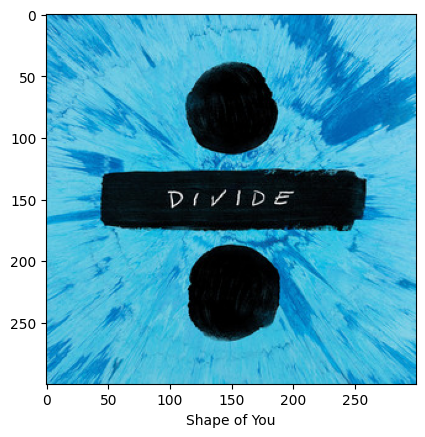

In [ ]:
#achando o ID
nome_musica = 'Ed Sheeran - Shape of You'
id = dados_totais[dados_totais['artists_song']== nome_musica]['id'].iloc[0]

# Requisição na API
track = sp.track(id)
url = track["album"]["images"][1]["url"]
name = track["name"]

# Mexendo com a imagem
image = io.imread(url)
plt.imshow(image)
plt.xlabel(name, fontsize = 10)
plt.show()

In [ ]:
def recommend_id(playlist_id):
  url = []
  name = []
  for i in playlist_id:
        track = sp.track(i)
        url.append(track["album"]["images"][1]["url"])
        name.append(track["name"])
  return name, url

In [ ]:
def visualize_songs(name, url):

    plt.figure(figsize=(15,10))
    columns = 5

    for i, u in enumerate(url):
        # define o ax como o subplot, com a divisão que retorna inteiro do número urls pelas colunas + 1 (no caso, 6)
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)

        # Lendo a imagem com o Scikit Image
        image = io.imread(u)

        # Mostra a imagem
        plt.imshow(image)

        # Para deixar o eixo Y invisível
        ax.get_yaxis().set_visible(False)

        # xticks define o local que vamos trocar os rótulos do eixo x, nesse caso, deixar os pontos de marcação brancos
        plt.xticks(color = 'w', fontsize = 0.1)

        # yticks define o local que vamos trocar os rótulos do eixo y, nesse caso, deixar os pontos de marcação brancos
        plt.yticks(color = 'w', fontsize = 0.1)

        # Colocando o nome da música no eixo x
        plt.xlabel(name[i], fontsize = 8)

        # Faz com que todos os parâmetros se encaixem no tamanho da imagem definido
        plt.tight_layout(h_pad=0.7, w_pad=0)

        # Ajusta os parâmetros de layout da imagem.
        # wspace = A largura do preenchimento entre subparcelas, como uma fração da largura média dos eixos.
        # hspace = A altura do preenchimento entre subparcelas, como uma fração da altura média dos eixos.
        plt.subplots_adjust(wspace=None, hspace=None)

        # Remove os ticks - marcadores, do eixo x, sem remover o eixo todo, deixando o nome da música.
        plt.tick_params(bottom = False)

        # Tirar a grade da imagem, gerada automaticamente pelo matplotlib
        plt.grid(visible=None)
    plt.show()

FileNotFoundError: ignored

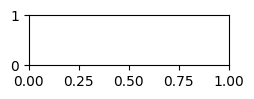

In [ ]:
visualize_songs(name, url)